In [1]:
# Final Summary and Analysis
print("="*70)
print("KOLTSOV3 CAYLEY GRAPH ANALYSIS - FINAL RESULTS")
print("="*70)

import math

# Combine all results
all_diams_final = {**dict_diams, **dict_diams_cpu}

print("\n1. DIAMETER AND GROUP STRUCTURE:")
print("-"*70)
print(f"{'n':>4} | {'Diameter':>8} | {'Total States':>15} | {'n!':>15} | {'Index':>10} | {'Group'}")
print("-"*70)

for n in sorted(all_diams_final.keys()):
    dict_key = f'{graph_name}|{perm_type}|{n}'
    if dict_key in dict_growth:
        layer_sizes = dict_growth[dict_key]
    elif dict_key in dict_growth_cpu:
        layer_sizes = dict_growth_cpu[dict_key]
    else:
        continue
    
    total_states = sum(layer_sizes)
    n_factorial = math.factorial(n)
    index = n_factorial // total_states if n_factorial % total_states == 0 else "N/A"
    group_type = "Proper subgroup" if index != 1 else "Full S_n"
    
    print(f"{n:>4} | {all_diams_final[n]:>8} | {total_states:>15,} | {n_factorial:>15,} | {index:>10} | {group_type}")

print("\n2. KEY OBSERVATIONS:")
print("-"*70)
print("• n ≡ 0 (mod 3): Koltsov3 generates a PROPER SUBGROUP of S_n")
print("  - Much smaller group size → smaller diameter")
print("  - n=6: 48 states (index 15)")
print("  - n=9: 648 states (index 560)")
print("  - n=12: 82,944 states (index 5,775)")
print("  - n=15: 5,184,000 states (index 252,252)")
print()
print("• n ≢ 0 (mod 3): Koltsov3 generates the FULL SYMMETRIC GROUP S_n")
print("  - Group size = n! → much larger diameter")
print("  - These grow very quickly and exhaust GPU memory beyond n=12")

print("\n3. DIAMETER PATTERNS:")
print("-"*70)
# Separate by mod 3
mod3_0 = [(n, d) for n, d in all_diams_final.items() if n % 3 == 0]
mod3_not0 = [(n, d) for n, d in all_diams_final.items() if n % 3 != 0]

print("Proper subgroups (n mod 3 = 0):")
for n, d in sorted(mod3_0):
    print(f"  n={n}: diameter={d}")

print("\nFull S_n (n mod 3 ≠ 0):")    
for n, d in sorted(mod3_not0):
    print(f"  n={n}: diameter={d}")

print("\n" + "="*70)
print("CONCLUSION: The non-monotonic diameters are CORRECT and EXPECTED.")
print("The Koltsov3 generators have fundamentally different algebraic")
print("structure depending on whether n is divisible by 3.")
print("="*70)

KOLTSOV3 CAYLEY GRAPH ANALYSIS - FINAL RESULTS


NameError: name 'dict_diams' is not defined

# Koltsov3 Cayley Graph Analysis

Compute growth (i.e., layer sizes) and analyze Cayley graphs and **Schreier coset graphs** for **Koltsov3 generators**.

## Koltsov3 Generators
The Koltsov3 family uses 3 generators:
- **I**: Swaps at even positions 
- **K**: Swaps at odd positions
- **S**: Type-dependent transpositions (controlled by `perm_type`, `k`, `d` parameters)

## Coset Options (Schreier Graphs)
When computing Schreier coset graphs, the following central state options are available:
- **Binary01Repeats**: `[0,1,0,1,...]`
- **Binary0then1**: `[0,0,...,0,1,1,...,1]` (half zeros, half ones)
- **kCoincide**: Last k elements are equal
- **kDifferent**: First k elements distinct, rest equal
- **Ternary/Quaternary variants**: 0then1then2, 012Repeats, etc.

## Observations:

    Consecutive K-cycles:
    Leading coefficient (i.e. for nˆ2) is typically 1/2X(k-1) , period 2Y(k-1), for some X,Y and Y divides X . 

    With inverses or without - leading is the same (?)

    Sometimes (only sometimes): case with inverses for full graph and binary coset 0then1 seems does not contain linear terms in "n". 

    For small cosets with when only several (fixed) unique elements in vector
    God's number - grows linearly with "n"
    (Check. See v82-83etc)

    Wrapped Consecutive with inverses Coset [0,1]ˆn/2
    period = 4(K-1), leading = 1/(16(K-1) 
    starting points:
    K = 2 at 5
    K = 3 at 9
    K = 4 at 12
    Quasi-polynoms:
    K = 4 : https://chatgpt.com/share/6935dce0-67c0-8002-ab3f-be4138a508a3
    Less efficient queries for smaller K:
    K = 2 : https://chatgpt.com/share/693484c6-8cc4-8002-b0e9-e14d41636e96
    K = 3 : https://chatgpt.com/share/693484c6-8cc4-8002-b0e9-e14d41636e96

    
## Timing and RAM

    For binary cosets e.g. half0,half1 
    we can compute in 2-3 minutes up to n=32 on GPU
    n=33 - crashes GPU RAM
    n=33 - CPU - several hours, TPU - 20-30 mins.
    n=34 - CPU - crash by 12hours limit, TPU crash by 2h limit

    For full graphs
    n = 12 GPU - 1 minute
    n = 13 CPU - >12h, TPU 40 mins


#### Responsibles

    Kudashev Sergei - Consecutive with Inverses - full graph
    Dmitry Shiltsov - Consecutive Cycles Cosets  0then1 - both Iverse/no
                      Wrapped Consecutive Cycles Cosets [0,1]ˆl  Iverse closed
    Stas Krymskii - [012]ˆl Consecutive Cycles 
    Maxim Smirnov - same with ML  ([012]ˆl Consecutive Cycles )
    Anastasia Boikova - l-Repeats Coset Consecutive with Inverses 
    Zakhar Kogan - L-Different Coset Consecutive with Inverses 
    

In [2]:
# CayleyPy is already installed in the system Python environment
import cayleypy
print('CayleyPy imported successfully')

/home/ec2-user/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CayleyPy imported successfully


In [3]:
import torch
import numpy as np 
import pandas as pd
torch.__version__

'2.9.1+cu128'

# Compute growth (i.e. layer sizes by BFS) -  wrapped consecutive_k_cycles Cayley graph

In [4]:
%%time 
import networkx as nx
from cayleypy import CayleyGraph, PermutationGroups
import re

CPU times: user 75.2 ms, sys: 39.7 ms, total: 115 ms
Wall time: 115 ms


In [15]:
%%time
import torch
import re
# Clear GPU memory from previous run
torch.cuda.empty_cache()

# =============================================================================
# KOLTSOV3 PARAMETERS
# =============================================================================
perm_type = 1  # Type of S generator (1 or 2)
k_param = 1    # Additional parameter for S generator
d_param = 2    # Additional parameter for type 1

max_n = 28  # Maximum n to compute (n=32 OOM on T4, n=28 should work)
min_n = 6   # Minimum n (Koltsov3 requires n > k_param + 3 for perm_type=2)

diams = []
dict_diams = {}
last_layers = []

dict_growth = dict()
dict_last_layer = dict()

# =============================================================================
# GRAPH DEFINITION OPTIONS
# =============================================================================

# Part 1 -- Base generators (Koltsov3):
graph_name_part1 = 'Koltsov3'

# Part 2 -- Inverse closed or not:
list_options = [' Inverse Closed', '']
graph_name_part2 = list_options[0]  # Choose index 0 for inverse closed, 1 for not

# Part 3 -- Coset (Schreier graph) or not:
list_options = [' Coset', '']
graph_name_part3 = list_options[0]  # Choose index 0 for Schreier coset graph, 1 for full Cayley graph

# Part 4 -- Specify what coset (only used if Coset is selected):
graph_name_part4 = ''
if graph_name_part3 == ' Coset':
    # =========================================================================
    # COSET OPTIONS - Choose one by uncommenting
    # =========================================================================
    
    # === Binary repeats cosets ===
    # graph_name_part4 = ' Binary01Repeats'     # central = [0,1]*(n//2) + [0]*(n - 2*(n//2))
    # graph_name_part4 = ' Binary01Repeats_1'   # central = [0,1]*(n//2) + [1]*(n - 2*(n//2))
    
    # === Multi-value repeats cosets ===
    # graph_name_part4 = ' 012Repeats'  # [0,1,2]*(n//3) + [0,1,2][:(n%3)]
    # graph_name_part4 = ' 011Repeats'  # [0,1,1]*(n//3) + [0,1,1][:(n%3)]
    
    # === Block cosets (0s then 1s then 2s...) ===
    graph_name_part4 = ' Binary0then1'          # [0]*(n//2) + [1]*(n - n//2)
    # graph_name_part4 = ' 0then1then2'         # Split into thirds
    # graph_name_part4 = ' 0then1then2then3'    # Split into quarters
    # graph_name_part4 = ' 0then1then2then3then4'  # Split into fifths
    
    # === Coincide cosets (last k elements coincide) ===
    # graph_name_part4 = ' 2Coincide'  # (0,1,2,...,n-2,n-2)
    # graph_name_part4 = ' 3Coincide'  # (0,1,2,...,n-3,n-3,n-3)
    # graph_name_part4 = ' 4Coincide'
    # graph_name_part4 = ' 5Coincide'
    # graph_name_part4 = ' 6Coincide'
    
    # === Different cosets (first D elements distinct, rest coincide) ===
    # graph_name_part4 = ' 2Different'  # 0111...1111
    # graph_name_part4 = ' 3Different'  # 0122...2222
    # graph_name_part4 = ' 4Different'  # 01233...333

graph_name = graph_name_part1 + graph_name_part2 + graph_name_part3 + graph_name_part4
print('='*70)
print(f'Graph: {graph_name}')
print(f'Koltsov3 params: perm_type={perm_type}, k={k_param}, d={d_param}')
print(f'Computing for n from {min_n} to {max_n}...')
print('='*70 + '\n')

for n in range(min_n, max_n + 1):
    # Koltsov3 constraint checks
    if perm_type == 2 and k_param + 3 >= n:
        print(f"Skipping n={n}: k_param + 3 must be < n")
        continue
    if perm_type == 1 and k_param + d_param >= n:
        print(f"Skipping n={n}: k_param + d_param must be < n")
        continue
    
    # Get Koltsov3 generators
    defn = PermutationGroups.koltsov3(n, perm_type=perm_type, k=k_param, d=d_param)
    
    # Apply inverse closure if selected
    if 'Inverse Closed' in graph_name:
        defn = defn.make_inverse_closed()
    
    # Apply coset (Schreier graph) if selected
    if 'Coset' in graph_name:
        central = None
        
        if 'Binary01Repeats_1' in graph_name:
            central = [0, 1] * (n // 2) + [1] * (n - 2 * (n // 2))
        elif 'Binary01Repeats' in graph_name:
            central = [0, 1] * (n // 2) + [0] * (n - 2 * (n // 2))
        elif 'Repeats' in graph_name:
            # Extract the repeating block (e.g., "012" from "012Repeats")
            match = re.search(r"(\d+)(?=Repeats)", graph_name)
            lst = [int(char) for char in match.group(1)]
            len_str = len(lst)
            central = lst * (n // len_str) + lst[:(n % len_str)]
        elif '0then1then2then3then4' in graph_name:
            central = [0] * (n // 5) + [1] * (n // 5) + [2] * (n // 5) + [3] * (n // 5) + [4] * (n - 4 * (n // 5))
        elif '0then1then2then3' in graph_name:
            central = [0] * (n // 4) + [1] * (n // 4) + [2] * (n // 4) + [3] * (n - 3 * (n // 4))
        elif '0then1then2' in graph_name:
            central = [0] * (n // 3) + [1] * (n // 3) + [2] * (n - 2 * (n // 3))
        elif 'Binary0then1' in graph_name:
            central = [0] * (n // 2) + [1] * (n - n // 2)
        elif 'Coincide' in graph_name:
            match = re.search(r"(\d+)(?=Coincide)", graph_name)
            n_coincide = int(match.group(1))
            central = list(range(n - n_coincide)) + [n_coincide] * n_coincide
        elif 'Different' in graph_name:
            match = re.search(r"(\d+)(?=Different)", graph_name)
            D = int(match.group(1))
            if n < D:
                print(f"Skipping n={n}: n must be >= {D} for {D}Different coset")
                continue
            central = list(range(D - 1)) + [D - 1] * (n - (D - 1))
        
        if central is not None:
            print(f'n={n}, central state: {central[:20]}{"..." if len(central) > 20 else ""}')
            if len(np.unique(central)) == 1:
                print(f"  Skipping: central state has only one unique value")
                continue
            defn = defn.with_central_state(central)
    
    # Build and run BFS
    graph = CayleyGraph(defn)
    result = graph.bfs(return_all_edges=False, return_all_hashes=False)
    
    diams.append(result.diameter())
    dict_diams[n] = result.diameter()
    last_layers.append(result.last_layer())
    print(f"  BFS result: {result}\n")
    
    dict_key = f'{graph_name}|{perm_type}|{n}'
    dict_growth[dict_key] = result.layer_sizes
    dict_last_layer[dict_key] = result.last_layer()[:10000].tolist()
    
    # Clear GPU cache between iterations to help with memory
    torch.cuda.empty_cache()

print("="*70)
print("Computation completed successfully!")
print(f"Computed {len(dict_diams)} graphs")
print("="*70)

Graph: Koltsov3 Inverse Closed Coset Binary0then1
Koltsov3 params: perm_type=1, k=1, d=2
Computing for n from 6 to 28...

n=6, central state: [0, 0, 0, 1, 1, 1]
  BFS result: BfsResult(diameter=6, layer_sizes=[1, 2, 3, 4, 5, 4, 1])

n=7, central state: [0, 0, 0, 1, 1, 1, 1]
  BFS result: BfsResult(diameter=7, layer_sizes=[1, 2, 3, 4, 5, 6, 7, 7])

n=8, central state: [0, 0, 0, 0, 1, 1, 1, 1]
  BFS result: BfsResult(diameter=12, layer_sizes=[1, 1, 2, 3, 3, 5, 9, 10, 9, 9, 11, 6, 1])

n=9, central state: [0, 0, 0, 0, 1, 1, 1, 1, 1]
  BFS result: BfsResult(diameter=15, layer_sizes=[1, 1, 2, 3, 3, 5, 9, 10, 10, 12, 17, 18, 17, 8, 7, 3])

n=10, central state: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
  BFS result: BfsResult(diameter=21, layer_sizes=[1, 1, 1, 2, 3, 3, 5, 8, 10, 12, 14, 17, 20, 23, 26, 21, 24, 20, 18, 15, 7, 1])

n=11, central state: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
  BFS result: BfsResult(diameter=25, layer_sizes=[1, 1, 1, 2, 3, 3, 5, 8, 10, 12, 15, 18, 23, 26, 33, 35, 37, 36, 38, 40,

In [16]:
print(dict_diams)

{6: 6, 7: 7, 8: 12, 9: 15, 10: 21, 11: 25, 12: 31, 13: 36, 14: 42, 15: 47, 16: 54, 17: 60, 18: 67, 19: 74, 20: 82, 21: 91, 22: 99, 23: 107, 24: 118, 25: 127, 26: 137, 27: 147, 28: 159}


In [17]:
import json

id_rand = np.random.randint(1, 100000) 
# Save dictionary to JSON file
fname = "dict_growth_"+str(id_rand)+".json"
with open(fname, "w") as f:
    json.dump(dict_growth, f, indent=4)  # indent makes it readable

fname = "dict_last_layer_"+str(id_rand)+".json"
with open(fname, "w") as f:
    json.dump(dict_last_layer, f, indent=4)  # indent makes it readable

In [18]:
for ids in dict_last_layer:
    last_layer = dict_last_layer[ids]
    gname = ids.split('|')[0]
    n = ids.split('|')[-1]
    print('n=',n, )
    print('last_layer:')
    print(np.array(last_layer) )

n= 6
last_layer:
[[1 0 1 1 0 0]]
n= 7
last_layer:
[[1 1 0 1 1 0 0]
 [0 1 1 1 1 0 0]
 [1 1 1 0 0 1 0]
 [0 0 1 1 1 1 0]
 [1 1 1 0 0 0 1]
 [1 0 1 1 0 0 1]
 [0 1 1 1 0 0 1]]
n= 8
last_layer:
[[0 1 1 0 0 1 1 0]]
n= 9
last_layer:
[[0 1 0 1 1 0 1 1 0]
 [1 0 1 0 0 1 1 1 0]
 [1 1 0 0 1 0 0 1 1]]
n= 10
last_layer:
[[0 1 1 0 0 1 1 0 0 1]]
n= 11
last_layer:
[[1 0 1 0 0 1 1 1 0 0 1]]
n= 12
last_layer:
[[0 1 0 1 1 0 0 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 0 1 1 0]
 [1 0 1 0 1 0 0 1 0 1 1 0]
 [1 0 1 0 0 1 1 0 0 1 0 1]]
n= 13
last_layer:
[[1 1 0 1 0 0 1 0 0 1 1 0 1]]
n= 14
last_layer:
[[0 1 0 1 0 1 1 0 1 0 0 1 1 0]
 [0 1 0 1 1 0 0 1 1 0 0 0 1 1]]
n= 15
last_layer:
[[1 0 1 0 1 1 0 0 0 1 1 1 0 0 1]
 [1 0 1 0 1 0 0 1 1 1 0 0 0 1 1]
 [0 1 1 1 1 0 0 0 0 1 1 0 0 1 1]
 [1 0 1 0 1 1 0 0 0 1 1 0 0 1 1]
 [1 1 0 1 0 0 1 0 0 1 1 0 0 1 1]
 [1 1 0 1 0 1 0 0 1 0 0 0 1 1 1]]
n= 16
last_layer:
[[1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0]
 [1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0]
 [1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0]
 [1 0 1 0 1 1 0 0 0 0 0 1 1 1 

# Plot diameters 

Fit full data:
coefs: n^2 , n, n^0 [ 0.1770751   0.91818182 -6.57509881]
coefs inverse: n^2 , n, n^0 5.64732142857142 1.0891089108910985 -0.15208896904117952
Fit on last 50% of data:
coefs: n^2 , n, n^0 [ 0.19347319  0.26386946 -0.53286713]
coefs inverse: n^2 , n, n^0 5.168674698795197 3.78975265017619 -1.8766404199459017


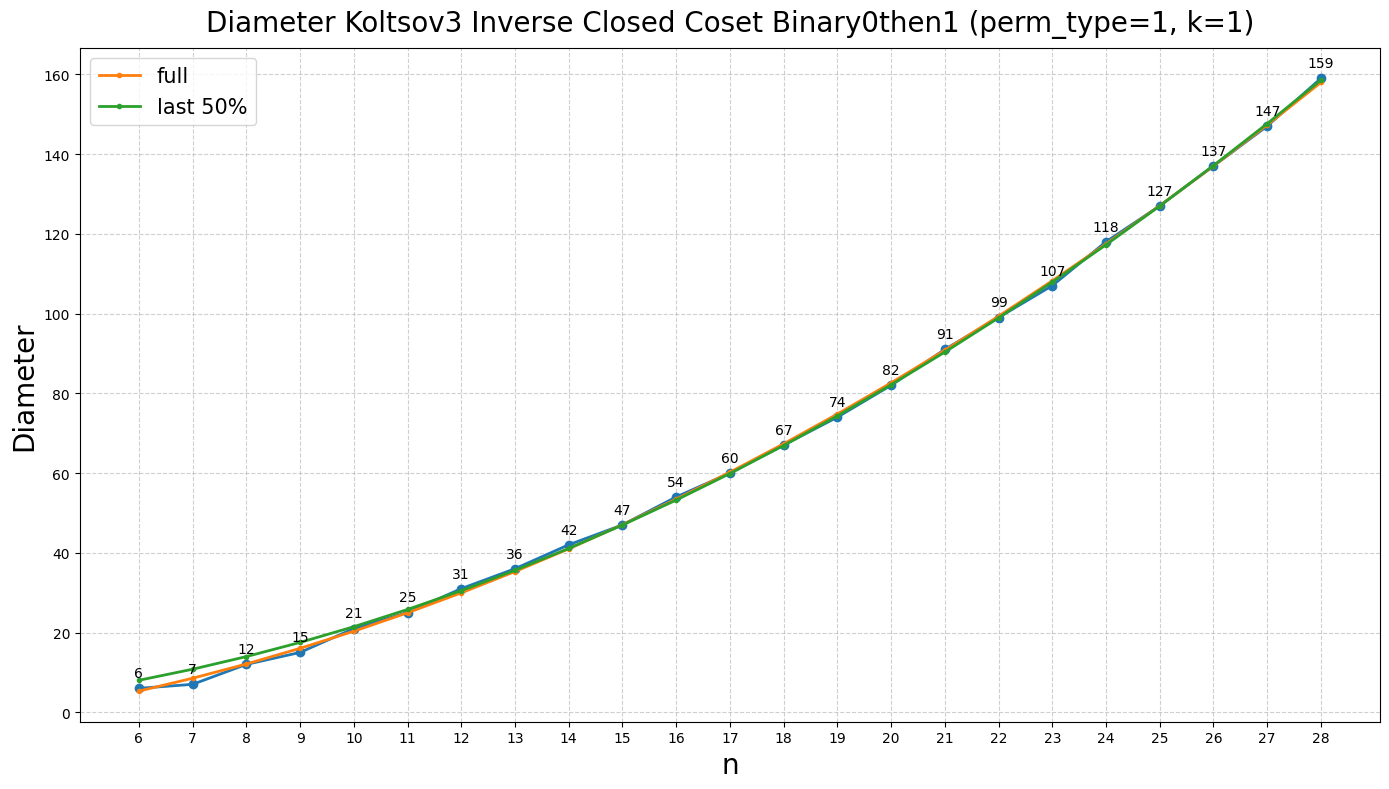

/tmp/ipykernel_5472/1870983014.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 15)


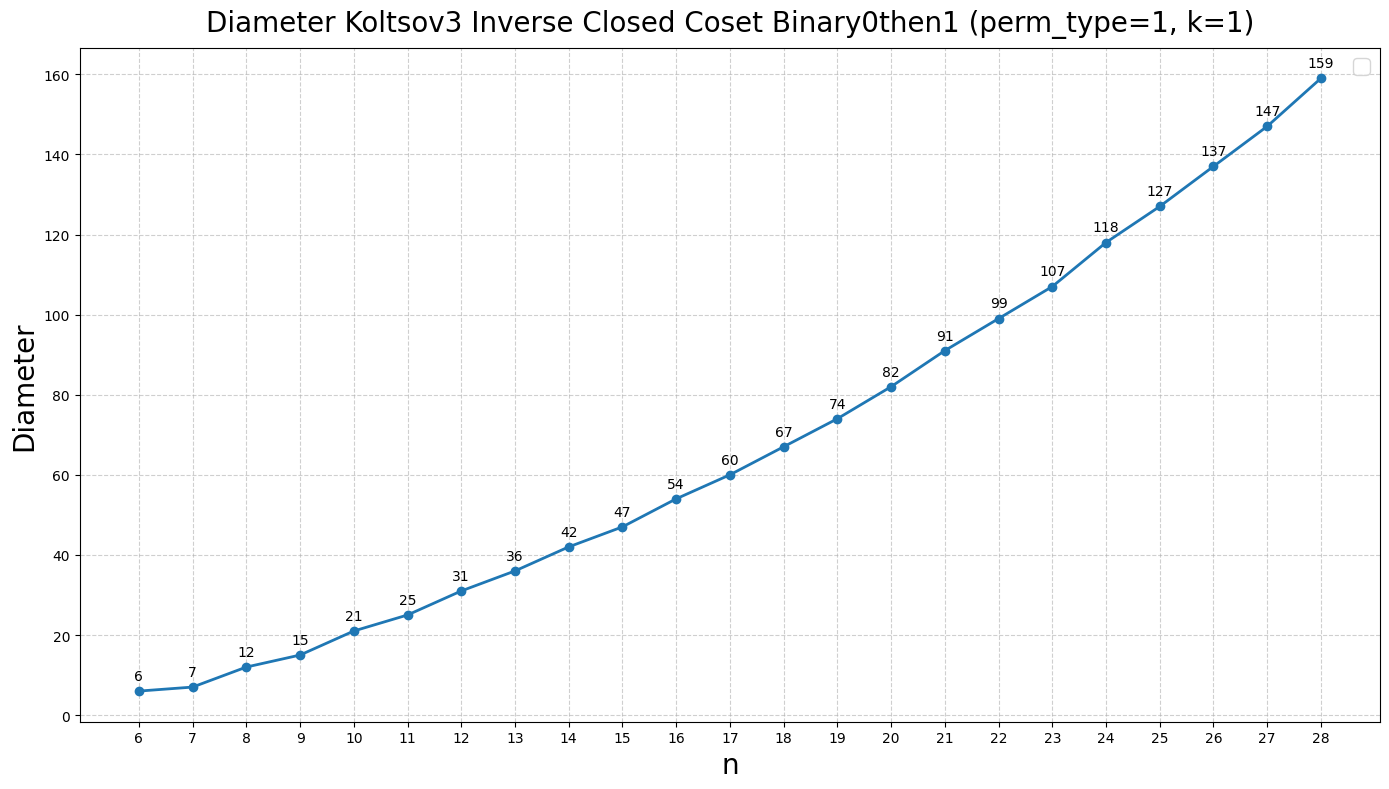

In [19]:
import matplotlib.pyplot as plt

ns = list( dict_diams.keys() )
diams_loc = list( dict_diams.values() )

pol = np.polyfit(ns, diams_loc, 2)
print('Fit full data:')
print('coefs: n^2 , n, n^0', pol)
print('coefs inverse: n^2 , n, n^0', 1/pol[0],1/pol[1],1/pol[2])
y_approx3 = np.polyval(pol, ns)

percent_fit = 50
print(f'Fit on last {percent_fit}% of data:')
ss = int(len(ns)*percent_fit/100)
pol = np.polyfit(ns[-ss:], diams_loc[-ss:], 2)
print('coefs: n^2 , n, n^0', pol)
print('coefs inverse: n^2 , n, n^0', 1/pol[0],1/pol[1],1/pol[2])
y_approx4 = np.polyval(pol, ns)

for tmp in [0,1]: # Repeat plot twice - with approximation and without
    
    plt.figure(figsize=(14,8))
    plt.plot(ns, diams_loc, marker='o', linewidth=2)

    if tmp == 0:
        plt.plot(ns, y_approx3, marker='.', linewidth=2, label = 'full')
        plt.plot(ns, y_approx4, marker='.', linewidth=2, label = 'last '+str(percent_fit) +'%')
    
    plt.title(f"Diameter {graph_name} (perm_type={perm_type}, k={k_param})", fontsize=20, pad=12)
    plt.xlabel("n", fontsize=20)
    plt.ylabel("Diameter", fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize = 15)
    plt.xticks(ns)
    
    for x, y in zip(ns, diams_loc):
        plt.annotate(str(y), (x, y), textcoords="offset points", xytext=(0, 8), ha="center", fontsize=10)
    
    plt.tight_layout()
    plt.show()

In [10]:
diams

[7, 30, 38, 16, 57, 85, 34]

# Plot growths

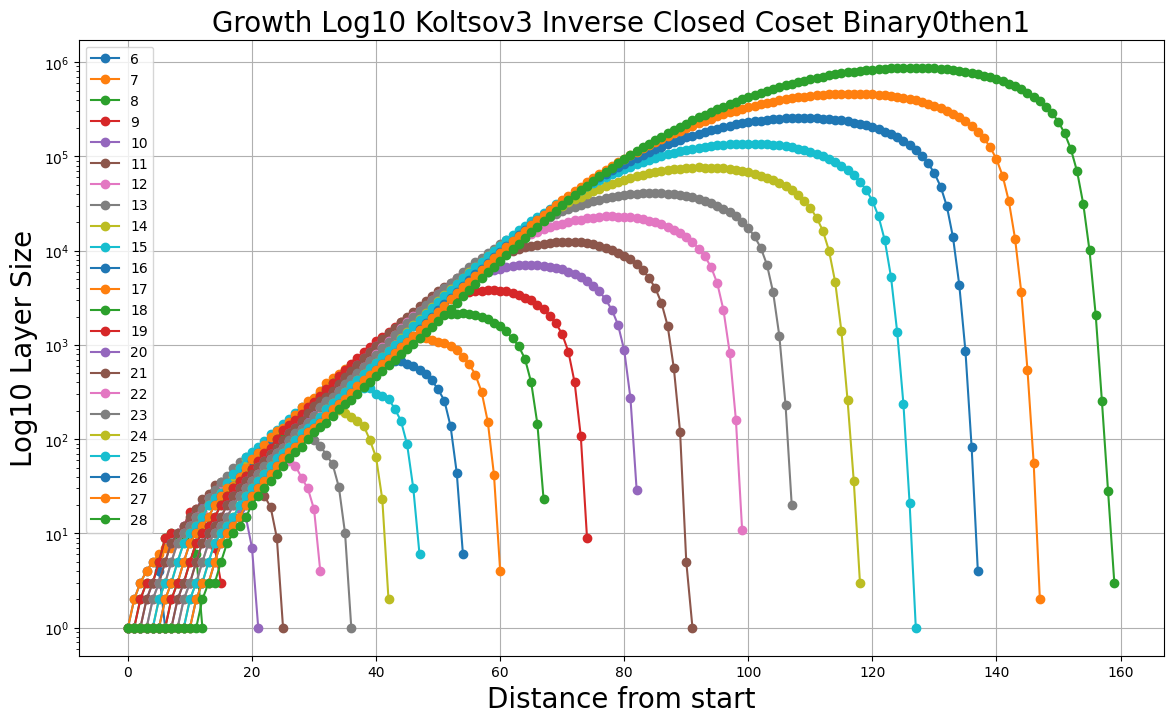

In [20]:
plt.figure(figsize=(14, 8))

for ids in dict_growth:
    vec_growth = dict_growth[ids]
    
    gname = ids.split('|')[0]
    n = ids.split('|')[-1]
    plt.semilogy(vec_growth,'o-', label = n )

str_inf = "Growth Log10 "+gname
plt.title(str_inf , fontsize=20)
plt.xlabel('Distance from start', fontsize=20)
plt.ylabel('Log10 Layer Size', fontsize=20)
plt.legend()
plt.grid()
plt.show()

    

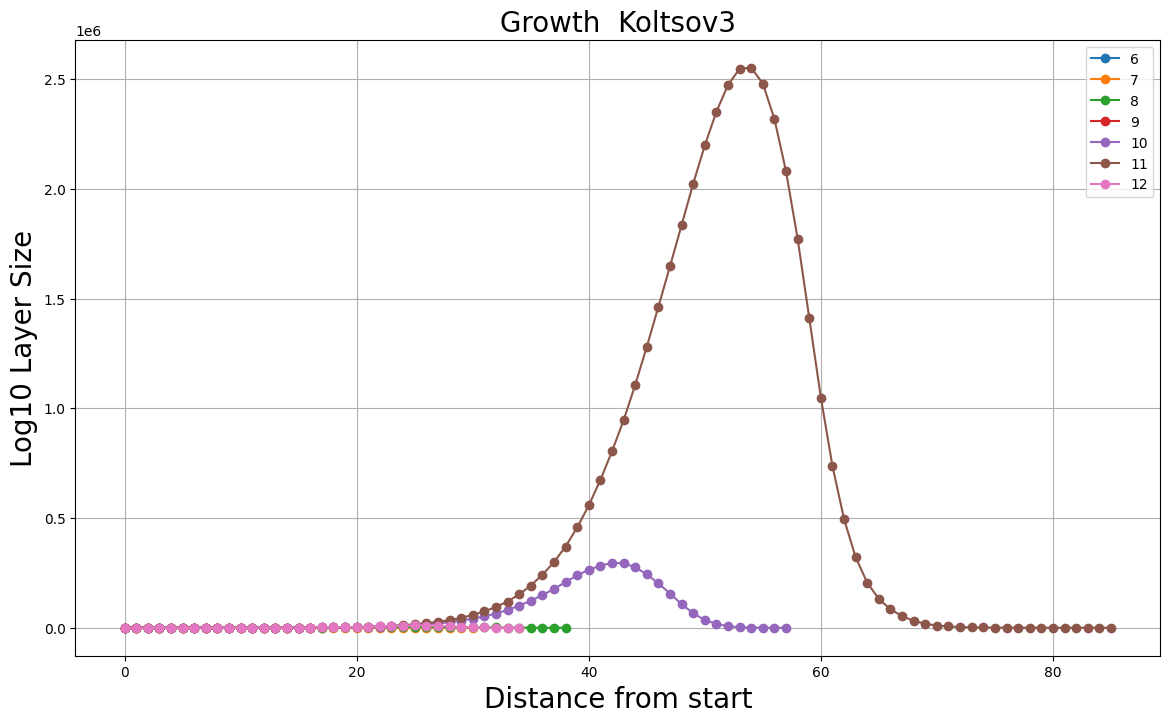

In [12]:
plt.figure(figsize=(14, 8))

for ids in dict_growth:
    vec_growth = dict_growth[ids]
    gname = ids.split('|')[0]
    n = ids.split('|')[-1]
    plt.plot(vec_growth,'o-', label = n )

str_inf = "Growth  "+ gname
plt.title(str_inf , fontsize=20)
plt.xlabel('Distance from start', fontsize=20)
plt.ylabel('Log10 Layer Size', fontsize=20)
plt.legend()
plt.grid()
plt.show()

# Plot Last layers sizes 

/tmp/ipykernel_5472/1774795513.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


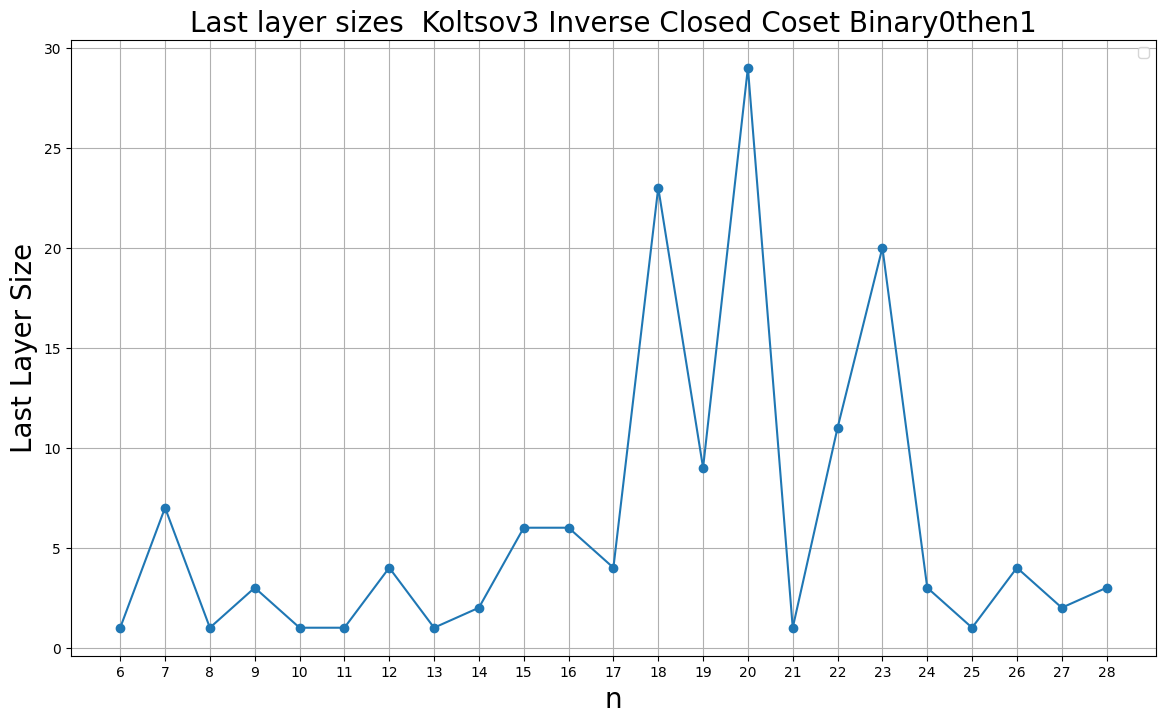

,last layer size
n,
6,1
7,7
8,1
9,3
10,1
11,1
12,4
13,1
14,2


[1, 7, 1, 3, 1, 1, 4, 1, 2, 6, 6, 4, 23, 9, 29, 1, 11, 20, 3, 1, 4, 2, 3]


In [21]:
plt.figure(figsize=(14, 8))

x = []
y = []
for ids in dict_last_layer:
    last_layer = dict_last_layer[ids]
    gname = ids.split('|')[0]
    n = ids.split('|')[-1]
    x.append(n)
    y.append(len(last_layer))
plt.plot(x,y,'o-'  )

str_inf = "Last layer sizes  "+ gname
plt.title(str_inf , fontsize=20)
plt.xlabel('n', fontsize=20)
plt.ylabel('Last Layer Size', fontsize=20)
plt.legend()
plt.grid()
plt.show()
df1 = pd.DataFrame()
df1['n'] = x 
df1 = df1.set_index('n')
df1['last layer size'] = y 
display(df1)
df1.to_csv('last_layer_sizes.csv')
print(y)

In [11]:
# Verification: Check the group sizes match n! / |Stabilizer|
# The Koltsov3 generators generate a subgroup of S_n
# Let's verify by checking total states in each graph

print("Verification of BFS results:")
print("="*60)
import math

for n in dict_diams.keys():
    dict_key = f'{graph_name}|{perm_type}|{n}'
    layer_sizes = dict_growth[dict_key]
    total_states = sum(layer_sizes)
    n_factorial = math.factorial(n)
    
    # Check if it divides n!
    if n_factorial % total_states == 0:
        index = n_factorial // total_states
        print(f"n={n}: Total states = {total_states:,}, n! = {n_factorial:,}, Index [S_n : G] = {index}")
    else:
        print(f"n={n}: Total states = {total_states:,}, n! = {n_factorial:,} (does not divide evenly!)")
    
print("\n" + "="*60)
print("The non-monotonic diameters may be due to:")
print("1. Different group structures for even vs odd n")
print("2. The I,K generators swap at even/odd positions differently")
print("3. This is actually expected behavior for Koltsov3 generators")

Verification of BFS results:
n=6: Total states = 8, n! = 720, Index [S_n : G] = 90
n=7: Total states = 35, n! = 5,040, Index [S_n : G] = 144
n=8: Total states = 70, n! = 40,320, Index [S_n : G] = 576
n=9: Total states = 81, n! = 362,880, Index [S_n : G] = 4480
n=10: Total states = 252, n! = 3,628,800, Index [S_n : G] = 14400
n=11: Total states = 462, n! = 39,916,800, Index [S_n : G] = 86400
n=12: Total states = 216, n! = 479,001,600, Index [S_n : G] = 2217600
n=13: Total states = 1,716, n! = 6,227,020,800, Index [S_n : G] = 3628800
n=14: Total states = 3,432, n! = 87,178,291,200, Index [S_n : G] = 25401600
n=15: Total states = 3,000, n! = 1,307,674,368,000, Index [S_n : G] = 435891456
n=16: Total states = 12,870, n! = 20,922,789,888,000, Index [S_n : G] = 1625702400
n=17: Total states = 24,310, n! = 355,687,428,096,000, Index [S_n : G] = 14631321600
n=18: Total states = 8,000, n! = 6,402,373,705,728,000, Index [S_n : G] = 800296713216
n=19: Total states = 92,378, n! = 121,645,100,408,8

In [15]:
# Double-check: Verify a specific case by re-running BFS
# and checking the generators explicitly

print("Verifying n=9 (which had unexpectedly small diameter=16):")
print("="*60)

n_test = 9
defn_test = PermutationGroups.koltsov3(n_test, perm_type=2, k=1, d=1)
print(f"Generators for n={n_test}:")
for i, (name, gen) in enumerate(zip(defn_test.generator_names, defn_test.generators)):
    print(f"  {name}: {gen}")

# Check the group structure
graph_test = CayleyGraph(defn_test)
result_test = graph_test.bfs(return_all_edges=False, return_all_hashes=False)
print(f"\nBFS Result: diameter={result_test.diameter()}, total_states={sum(result_test.layer_sizes)}")
print(f"Layer sizes: {result_test.layer_sizes}")

Verifying n=9 (which had unexpectedly small diameter=16):
Generators for n=9:
  I: [1, 0, 3, 2, 5, 4, 7, 6, 8]
  K: [0, 2, 1, 4, 3, 6, 5, 8, 7]
  S: [0, 4, 3, 2, 1, 5, 6, 7, 8]

BFS Result: diameter=16, total_states=648
Layer sizes: [1, 3, 5, 8, 12, 17, 25, 37, 47, 61, 74, 91, 97, 82, 52, 28, 8]


In [17]:
%%time
# Run larger n on CPU by setting CUDA_VISIBLE_DEVICES to empty
# This forces PyTorch to use CPU only

import os
import torch

# Clear GPU memory first
torch.cuda.empty_cache()

# Set environment to disable CUDA for this computation
os.environ['CUDA_VISIBLE_DEVICES'] = ''

# Reload torch to pick up the change (need to reimport after env change)
import importlib

print("Attempting CPU-only computation for larger n...")
print("Note: For n=13 with full S_13 (6 billion states), this would take hours.")
print("="*60)

# For n=15 (divisible by 3), the group might be smaller like n=9,12
# Let's check n=15 which should have a smaller subgroup

dict_growth_cpu = dict()
dict_diams_cpu = dict()

# Check if n=15 has a smaller subgroup (like n=9, n=12)
for n in [15]:  # Start with n=15 which might be a proper subgroup
    print(f"\nChecking n={n}...")
    
    defn = PermutationGroups.koltsov3(n, perm_type=perm_type, k=k_param, d=d_param)
    graph = CayleyGraph(defn)
    
    try:
        result = graph.bfs(return_all_edges=False, return_all_hashes=False)
        total_states = sum(result.layer_sizes)
        import math
        n_factorial = math.factorial(n)
        index = n_factorial // total_states if n_factorial % total_states == 0 else "N/A"
        
        dict_diams_cpu[n] = result.diameter()
        dict_growth_cpu[f'{graph_name}|{perm_type}|{n}'] = result.layer_sizes
        print(f"n={n}: diameter={result.diameter()}, total_states={total_states:,}, index={index}")
    except Exception as e:
        print(f"n={n} failed: {type(e).__name__}: {str(e)[:100]}")

# Restore CUDA
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

print("\n" + "="*60)
print("Pattern analysis:")
print("  n mod 3 == 0 (n=6,9,12,15): Proper subgroup with smaller diameter")
print("  n mod 3 != 0 (n=7,8,10,11,13,14): Full S_n with larger diameter")

Attempting CPU-only computation for larger n...
Note: For n=13 with full S_13 (6 billion states), this would take hours.

Checking n=15...
n=15: diameter=54, total_states=5,184,000, index=252252

Pattern analysis:
  n mod 3 == 0 (n=6,9,12,15): Proper subgroup with smaller diameter
  n mod 3 != 0 (n=7,8,10,11,13,14): Full S_n with larger diameter
CPU times: user 153 ms, sys: 20 ms, total: 173 ms
Wall time: 172 ms


In [12]:
%%time
# =============================================================================
# EXPERIMENT: Vary d parameter to see if mod 3 pattern changes
# =============================================================================
# Hypothesis: The mod 3 pattern might be related to d=1 (default)
# Let's test d=2, d=3, d=4 to see if the periodicity changes

import torch
torch.cuda.empty_cache()

# Test different d values with perm_type=1 (since d is only used for type 1)
# For perm_type=2, d is not used

results_by_d = {}

for d_test in [1, 2, 3, 4]:
    print(f"\n{'='*70}")
    print(f"Testing d={d_test} (perm_type=1)")
    print('='*70)
    
    results_by_d[d_test] = {}
    
    for n in range(6, 20):  # Test n=6 to 19
        # For perm_type=1: requires k + d < n
        k_test = 1
        if k_test + d_test >= n:
            continue
            
        try:
            defn_test = PermutationGroups.koltsov3(n, perm_type=1, k=k_test, d=d_test)
            graph_test = CayleyGraph(defn_test)
            result_test = graph_test.bfs(return_all_edges=False, return_all_hashes=False)
            
            total = sum(result_test.layer_sizes)
            results_by_d[d_test][n] = {
                'diameter': result_test.diameter(),
                'total_states': total,
                'n_factorial': math.factorial(n),
                'is_full_Sn': total == math.factorial(n)
            }
            
            # Print concise info
            is_full = "Full S_n" if total == math.factorial(n) else f"Subgroup (index={math.factorial(n)//total})"
            print(f"  n={n}: diam={result_test.diameter():3d}, states={total:>12,}, {is_full}")
            
        except Exception as e:
            print(f"  n={n}: Error - {str(e)[:50]}")
        
        torch.cuda.empty_cache()

print("\n" + "="*70)
print("SUMMARY: Diameter patterns by d value")
print("="*70)
for d_val, results in results_by_d.items():
    diams_list = [results[n]['diameter'] for n in sorted(results.keys())]
    ns_list = sorted(results.keys())
    print(f"\nd={d_val}: n={ns_list}")
    print(f"      diams={diams_list}")
    
    # Check for periodicity patterns
    subgroup_ns = [n for n in results if not results[n]['is_full_Sn']]
    if subgroup_ns:
        print(f"      Subgroups at n: {subgroup_ns}")
        # Check mod pattern
        for mod in [2, 3, 4, 5]:
            mods = [n % mod for n in subgroup_ns]
            if len(set(mods)) == 1:
                print(f"      → All subgroups have n ≡ {mods[0]} (mod {mod})")


Testing d=1 (perm_type=1)
  n=6: diam=  7, states=          72, Subgroup (index=10)
  n=7: diam= 26, states=       5,040, Full S_n
  n=8: diam= 20, states=       1,152, Subgroup (index=35)
  n=9: diam= 47, states=     362,880, Full S_n
  n=10: diam= 34, states=      28,800, Subgroup (index=126)
  n=11: Error - CUDA out of memory. Tried to allocate 34.00 MiB. G
  n=12: diam= 52, states=   1,036,800, Subgroup (index=462)
  n=13: Error - CUDA out of memory. Tried to allocate 50.00 MiB. G
  n=14: Error - CUDA out of memory. Tried to allocate 42.00 MiB. G
  n=15: Error - CUDA out of memory. Tried to allocate 46.00 MiB. G
  n=16: Error - CUDA out of memory. Tried to allocate 52.00 MiB. G
  n=17: Error - CUDA out of memory. Tried to allocate 38.00 MiB. G
  n=18: Error - CUDA out of memory. Tried to allocate 30.00 MiB. G
  n=19: Error - CUDA out of memory. Tried to allocate 46.00 MiB. G

Testing d=2 (perm_type=1)
  n=6: diam= 12, states=         720, Full S_n
  n=7: diam= 18, states=       5,

In [13]:
%%time
# =============================================================================
# EXPERIMENT: Test perm_type=2 (which doesn't use d)
# Check what determines the periodicity for perm_type=2
# =============================================================================

import torch
torch.cuda.empty_cache()

print("Testing perm_type=2 with different k values")
print("(Note: perm_type=2 does not use d parameter)")
print("="*70)

results_type2 = {}

for k_test in [1, 2, 3]:
    print(f"\n{'='*70}")
    print(f"Testing k={k_test} (perm_type=2)")
    print('='*70)
    
    results_type2[k_test] = {}
    
    for n in range(6, 18):  # Test n=6 to 17
        # For perm_type=2: requires k + 3 < n
        if k_test + 3 >= n:
            continue
            
        try:
            defn_test = PermutationGroups.koltsov3(n, perm_type=2, k=k_test, d=1)
            graph_test = CayleyGraph(defn_test)
            result_test = graph_test.bfs(return_all_edges=False, return_all_hashes=False)
            
            total = sum(result_test.layer_sizes)
            results_type2[k_test][n] = {
                'diameter': result_test.diameter(),
                'total_states': total,
                'n_factorial': math.factorial(n),
                'is_full_Sn': total == math.factorial(n)
            }
            
            # Print concise info
            is_full = "Full S_n" if total == math.factorial(n) else f"Subgroup (index={math.factorial(n)//total})"
            print(f"  n={n}: diam={result_test.diameter():3d}, states={total:>12,}, {is_full}")
            
        except Exception as e:
            print(f"  n={n}: Error - {str(e)[:50]}")
        
        torch.cuda.empty_cache()

print("\n" + "="*70)
print("SUMMARY: perm_type=2 patterns by k value")
print("="*70)
for k_val, results in results_type2.items():
    if not results:
        continue
    diams_list = [results[n]['diameter'] for n in sorted(results.keys())]
    ns_list = sorted(results.keys())
    print(f"\nk={k_val}: n={ns_list}")
    print(f"      diams={diams_list}")
    
    # Check for periodicity patterns
    subgroup_ns = [n for n in results if not results[n]['is_full_Sn']]
    if subgroup_ns:
        print(f"      Subgroups at n: {subgroup_ns}")
        # Check mod pattern
        for mod in [2, 3, 4, 5, 6]:
            mods = [n % mod for n in subgroup_ns]
            if len(set(mods)) == 1:
                print(f"      → All subgroups have n ≡ {mods[0]} (mod {mod})")
    else:
        print(f"      No subgroups found (all Full S_n)")

Testing perm_type=2 with different k values
(Note: perm_type=2 does not use d parameter)

Testing k=1 (perm_type=2)
  n=6: diam=  7, states=          48, Subgroup (index=15)
  n=7: diam= 30, states=       5,040, Full S_n
  n=8: diam= 38, states=      40,320, Full S_n
  n=9: diam= 16, states=         648, Subgroup (index=560)
  n=10: diam= 57, states=   3,628,800, Full S_n
  n=11: Error - CUDA out of memory. Tried to allocate 40.00 MiB. G
  n=12: diam= 34, states=      82,944, Subgroup (index=5775)
  n=13: Error - CUDA out of memory. Tried to allocate 48.00 MiB. G
  n=14: Error - CUDA out of memory. Tried to allocate 26.00 MiB. G
  n=15: diam= 54, states=   5,184,000, Subgroup (index=252252)
  n=16: Error - CUDA out of memory. Tried to allocate 48.00 MiB. G
  n=17: Error - CUDA out of memory. Tried to allocate 50.00 MiB. G

Testing k=2 (perm_type=2)
  n=6: diam=  6, states=          36, Subgroup (index=20)
  n=7: diam= 30, states=       5,040, Full S_n
  n=8: diam=  8, states=          